## 加载数据

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df_train_trans=pd.read_csv('../input/transaction_TRAIN.csv') # (161965, 27)
df_train_op=pd.read_csv('../input/operation_TRAIN.csv') # (424481, 20)
df_train_tag=pd.read_csv('../input/tag_TRAIN.csv') # (13422, 2)

In [2]:
df_train_trans.rename(columns=lambda col:'trans_'+col if col!='UID' else col,inplace=True)
df_train_trans.head()

,UID,trans_channel,trans_day,trans_time,trans_trans_amt,trans_amt_src1,trans_merchant,trans_code1,trans_code2,trans_trans_type1,...,trans_ip1,trans_bal,trans_amt_src2,trans_acc_id2,trans_acc_id3,trans_geo_code,trans_trans_type2,trans_market_code,trans_market_type,trans_ip1_sub
0,19092,102,30,11:48:47,1459,acdbdb842ac20f1e,abc6bc660561e0eb,NaN,NaN,26bcf43a19df14c8,...,a664530c1fb20abe,1007,9fefed0a981dcb7a,NaN,NaN,wsbq,102.0,2ecf94369847c748,1.0,45f4ca1f4e9b9cb7
1,13465,140,23,16:58:03,725,4d7831c6f695ab19,7a87b1aa20972d48,NaN,NaN,c2f2023d279665b2,...,52abe1e300a8aa10,100,NaN,NaN,NaN,wte7,105.0,NaN,NaN,2b416f1d7e89ad3b
2,13713,140,22,09:56:39,127,c5fc631370cabc0d,cfd035fc7e0a53b2,NaN,NaN,c2f2023d279665b2,...,e4c132d02ff6c095,100,NaN,NaN,NaN,ws7n,105.0,NaN,NaN,ff71a556d86c4b8f
3,22703,140,1,18:11:45,99317,a571c7fda8b7df37,c71c876b8979028e,NaN,NaN,c2f2023d279665b2,...,e1c78a56cc9dfc8b,100,fbf6bf3c8927414c,NaN,NaN,wqj6,NaN,NaN,NaN,cf1527a0b4173e8f
4,17816,140,22,13:04:02,3361,c5fc631370cabc0d,6628f5ca013e3582,NaN,NaN,c2f2023d279665b2,...,abb6b4b8f15be6d6,100,NaN,NaN,NaN,NaN,105.0,NaN,NaN,cbc62c2b1cb7deb9


In [3]:
df_train_op.rename(columns=lambda col:'op_'+col if col!='UID' else col,inplace=True)
df_train_op.head()

,UID,op_day,op_mode,op_success,op_time,op_os,op_version,op_device1,op_device2,op_device_code1,op_device_code2,op_device_code3,op_mac1,op_mac2,op_ip1,op_ip2,op_wifi,op_geo_code,op_ip1_sub,op_ip2_sub
0,10035,30,c8741ce15ceac2a4,1.0,17:51:50,102,7.0.9,49dd36968dbfadda,OPPO R11,ecb58082e0e9b8e2,00fa2e4ba95605ef,NaN,NaN,a8dc52f65085212e,55dd8936655c86f6,NaN,NaN,wskx,e58e48fb9215116e,NaN
1,16264,16,20a91b45ef8f8221,1.0,08:36:00,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fc7fc47d6c93f554,NaN,NaN,NaN,3502c553ea2ac187
2,13162,8,b668e42707ee9c7b,0.0,18:09:57,102,7.0.5,630a1adff2a87007,MI MAX 2,1da225cb679a37eb,f18538156b8f9b57,NaN,a8dc52f65085212e,NaN,2147d925e7a8ba3c,NaN,NaN,NaN,3591678eca3f7a23,NaN
3,21392,23,c8741ce15ceac2a4,1.0,23:53:49,102,7.0.9,630a1adff2a87007,MI 5X,d0c285513b785609,a7e79e3c2c85c8c7,NaN,NaN,04a2d6c090518faa,c52efc665f0af581,NaN,4ff1553b1c96360e,wm4v,fdb5e20f6a6f2cd7,NaN
4,18599,26,acfaded7e04e7ba0,1.0,11:11:15,102,7.0.0,8399be6b80847240,NaN,27efd832595503f6,b6457e2264266257,NaN,NaN,1ab9dc3eae102aa6,0fe293bea342665a,NaN,NaN,NaN,f5009e2c6c13c80c,NaN


## 脱敏后账户余额
- 所有用户
- 黑用户
- 白用户

- 总体分布

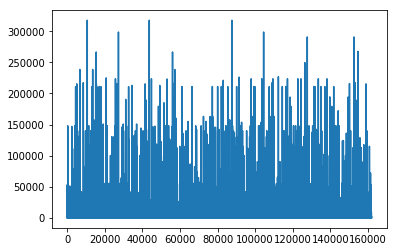

In [12]:
plt.plot(df_train_trans['trans_bal'].values/100)
plt.show()

整体分布差异很大，跨度很大，余额高用户还是余额地用户是羊毛党?


In [13]:
df_tag_uids=df_train_tag['UID'] # 标签中的UID都是唯一的
black_uids=df_train_tag[df_train_tag['Tag']==1]['UID']
white_uids=df_train_tag[df_train_tag['Tag']==0]['UID']

black_trans=df_train_trans[df_train_trans['UID'].isin(black_uids)]
white_trans=df_train_trans[df_train_trans['UID'].isin(white_uids)]

- 黑用户的交易之后余额

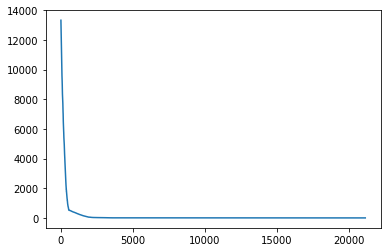

In [27]:
plt.plot(black_trans['trans_bal'].sort_values(ascending=False).values/100)
plt.show()

- 白用户的交易之后余额

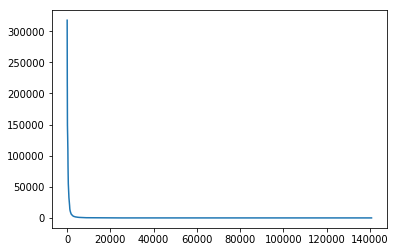

In [28]:
plt.plot(white_trans['trans_bal'].sort_values(ascending=False).values/100)
plt.show()

- 每个黑用户的交易之后余额平均值

In [43]:
black_bal_mean= black_trans.groupby('UID').mean()['trans_bal']/100
black_bal_mean[:20]

UID
10000      1.000000
10019      2.464000
10021     10.514868
10041      1.000000
10058     17.307273
10064      1.000000
10076      1.000000
10097     47.391111
10105      3.520000
10123      9.116269
10165      1.000000
10173      1.000000
10185    201.880000
10192     46.288193
10201    229.333750
10213     93.555833
10217      1.000000
10226    159.563333
10252      1.000000
10259     95.167143
Name: trans_bal, dtype: float64

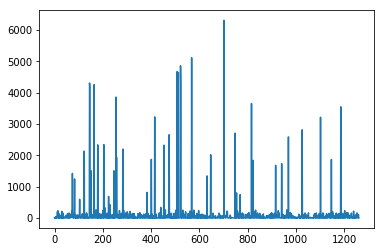

In [40]:
plt.plot(black_bal_mean.values)
plt.show()

- 每个白用户的交易之后余额平均值

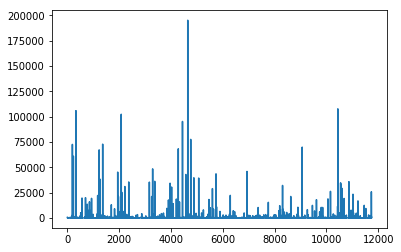

In [42]:
white_bal_mean= white_trans.groupby('UID').mean()['trans_bal']/100
plt.plot(white_bal_mean.values)
plt.show()

我们看到黑白用户交易后平均值，平均值差别很大，看y轴